In [2]:
# Dependencies
import requests
import pandas as pd
from census import Census
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [4]:
# Import U.S. Census API Key
from api_key import api_key

# Create an instance of the Census library
c = Census(
    api_key,
    year = 2020
)

## Retrieve data from the U.S. Census using the Census library

References:

* Review the following page to review the Python library documentation: <https://github.com/CommerceDataService/census-wrapper>

* Review the following page to learn more about the data labels: <https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b>

In [5]:
api_key

'9e43867a81ebd3ab527c43e714f159626edcd14e'

In [6]:
# Run Census Search to retrieve data on all zip codes (2020 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column renaming
census_pd = census_pd.rename(
    columns = {
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "NAME": "Name",
        "state": "State"
    }
)

# Add a Poverty Rate column (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Configure the final DataFrame
census_pd = census_pd[
    [
        "State",
        "Population",
        "Median Age",
        "Household Income",
        "Per Capita Income",
        "Poverty Count",
        "Poverty Rate"
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd)}")
census_pd

Number of rows in the DataFrame: 52


,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,42,12794885.0,40.9,63627.0,35518.0,1480430.0,11.570483
1,06,39346023.0,36.7,78672.0,38576.0,4853434.0,12.335259
2,54,1807426.0,42.7,48037.0,27346.0,300152.0,16.606600
3,49,3151239.0,31.1,74197.0,30986.0,283360.0,8.992019
4,36,19514849.0,39.0,71117.0,40898.0,2581048.0,13.226072
5,11,701974.0,34.1,90842.0,58659.0,103391.0,14.728608
6,02,736990.0,34.6,77790.0,37094.0,74369.0,10.090910
7,12,21216924.0,42.2,57703.0,32848.0,2772939.0,13.069468
8,45,5091517.0,39.7,54864.0,30727.0,726470.0,14.268243
9,38,760394.0,35.2,65315.0,36289.0,77491.0,10.190901


In [7]:
census_pd['State'].dtype

dtype('O')

In [16]:
# !pip install us

In [8]:
from us import states
state_list = {state.fips: state.name for state in states.STATES}

In [9]:
census_pd['State'] = census_pd['State'].map(state_list)

In [10]:
state_list

{'01': 'Alabama',
 '02': 'Alaska',
 '04': 'Arizona',
 '05': 'Arkansas',
 '06': 'California',
 '08': 'Colorado',
 '09': 'Connecticut',
 '10': 'Delaware',
 '12': 'Florida',
 '13': 'Georgia',
 '15': 'Hawaii',
 '16': 'Idaho',
 '17': 'Illinois',
 '18': 'Indiana',
 '19': 'Iowa',
 '20': 'Kansas',
 '21': 'Kentucky',
 '22': 'Louisiana',
 '23': 'Maine',
 '24': 'Maryland',
 '25': 'Massachusetts',
 '26': 'Michigan',
 '27': 'Minnesota',
 '28': 'Mississippi',
 '29': 'Missouri',
 '30': 'Montana',
 '31': 'Nebraska',
 '32': 'Nevada',
 '33': 'New Hampshire',
 '34': 'New Jersey',
 '35': 'New Mexico',
 '36': 'New York',
 '37': 'North Carolina',
 '38': 'North Dakota',
 '39': 'Ohio',
 '40': 'Oklahoma',
 '41': 'Oregon',
 '42': 'Pennsylvania',
 '44': 'Rhode Island',
 '45': 'South Carolina',
 '46': 'South Dakota',
 '47': 'Tennessee',
 '48': 'Texas',
 '49': 'Utah',
 '50': 'Vermont',
 '51': 'Virginia',
 '53': 'Washington',
 '54': 'West Virginia',
 '55': 'Wisconsin',
 '56': 'Wyoming'}

In [11]:
census_pd

,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Pennsylvania,12794885.0,40.9,63627.0,35518.0,1480430.0,11.570483
1,California,39346023.0,36.7,78672.0,38576.0,4853434.0,12.335259
2,West Virginia,1807426.0,42.7,48037.0,27346.0,300152.0,16.606600
3,Utah,3151239.0,31.1,74197.0,30986.0,283360.0,8.992019
4,New York,19514849.0,39.0,71117.0,40898.0,2581048.0,13.226072
5,NaN,701974.0,34.1,90842.0,58659.0,103391.0,14.728608
6,Alaska,736990.0,34.6,77790.0,37094.0,74369.0,10.090910
7,Florida,21216924.0,42.2,57703.0,32848.0,2772939.0,13.069468
8,South Carolina,5091517.0,39.7,54864.0,30727.0,726470.0,14.268243
9,North Dakota,760394.0,35.2,65315.0,36289.0,77491.0,10.190901


In [12]:
census_pd['Region'] = ['Northeast', 'West', 'Southeast', 'West', 'Northeast', 'Northeast', 'West', 'Southeast', 'Southeast', 'Midwest', 'Northeast', 'Southeast', 'Southeast', 'Northeast', 'West', 'West', 'Southwest', 'Southeast', 'Midwest', 'West', 'Northeast', 'West', 'Midwest', 'Northeast', 'Southwest', 'West', 'Midwest', 'Midwest', 'West', 'Northeast', 'Northeast', 'Southeast', 'Northeast', 'Southeast', 'Southeast', 'West', 'Midwest', 'Midwest', 'Midwest', 'Southeast', 'Midwest', 'Midwest', 'Northeast', 'Midwest', 'Midwest', 'Southwest', 'West', 'Northeast', 'Southeast', 'Southeast', 'Midwest', 'Southeast' ]
census_pd

,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Region
0,Pennsylvania,12794885.0,40.9,63627.0,35518.0,1480430.0,11.570483,Northeast
1,California,39346023.0,36.7,78672.0,38576.0,4853434.0,12.335259,West
2,West Virginia,1807426.0,42.7,48037.0,27346.0,300152.0,16.606600,Southeast
3,Utah,3151239.0,31.1,74197.0,30986.0,283360.0,8.992019,West
4,New York,19514849.0,39.0,71117.0,40898.0,2581048.0,13.226072,Northeast
5,NaN,701974.0,34.1,90842.0,58659.0,103391.0,14.728608,Northeast
6,Alaska,736990.0,34.6,77790.0,37094.0,74369.0,10.090910,West
7,Florida,21216924.0,42.2,57703.0,32848.0,2772939.0,13.069468,Southeast
8,South Carolina,5091517.0,39.7,54864.0,30727.0,726470.0,14.268243,Southeast
9,North Dakota,760394.0,35.2,65315.0,36289.0,77491.0,10.190901,Midwest


In [44]:
census_pd = census_pd.dropna()
census_pd

,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Region
0,Pennsylvania,12794885.0,40.9,63627.0,35518.0,1480430.0,11.570483,Northeast
1,California,39346023.0,36.7,78672.0,38576.0,4853434.0,12.335259,West
2,West Virginia,1807426.0,42.7,48037.0,27346.0,300152.0,16.606600,Southeast
3,Utah,3151239.0,31.1,74197.0,30986.0,283360.0,8.992019,West
4,New York,19514849.0,39.0,71117.0,40898.0,2581048.0,13.226072,Northeast
6,Alaska,736990.0,34.6,77790.0,37094.0,74369.0,10.090910,West
7,Florida,21216924.0,42.2,57703.0,32848.0,2772939.0,13.069468,Southeast
8,South Carolina,5091517.0,39.7,54864.0,30727.0,726470.0,14.268243,Southeast
9,North Dakota,760394.0,35.2,65315.0,36289.0,77491.0,10.190901,Midwest
10,Maine,1340825.0,44.8,59489.0,33774.0,144384.0,10.768296,Northeast


In [45]:
# Calculate Average median age by Region
age_by_region = census_pd.groupby(["Region"])["Median Age"].mean()
age_by_region

Region
Midwest      37.900000
Northeast    41.000000
Southeast    39.083333
Southwest    36.933333
West         37.172727
Name: Median Age, dtype: float64

In [46]:
# Calculate Average household income by Region
income_by_region = census_pd.groupby(["Region"])["Household Income"].mean()
income_by_region

Region
Midwest      61767.000000
Northeast    73781.454545
Southeast    55063.333333
Southwest    58866.000000
West         70412.454545
Name: Household Income, dtype: float64

In [47]:
# Calculate Average per capita income by Region
per_capita_income_by_region = census_pd.groupby(["Region"])["Per Capita Income"].mean()
per_capita_income_by_region

Region
Midwest      33468.384615
Northeast    40007.636364
Southeast    30684.333333
Southwest    30820.666667
West         35313.181818
Name: Per Capita Income, dtype: float64

In [48]:
# Create new dataframe for averages in regions
region_averages_df = pd.DataFrame({
    "Average Median Age": age_by_region,
    "Average Household Income": income_by_region,
    "Average Per Capita Income": per_capita_income_by_region
                                })
region_averages_df.iloc[:,0] = region_averages_df.iloc[:,0].astype(int)
region_averages_df.iloc[:,1] = region_averages_df.iloc[:,1].astype(int)
region_averages_df.iloc[:,2] = region_averages_df.iloc[:,2].astype(int)

region_averages_df

,Average Median Age,Average Household Income,Average Per Capita Income
Region,,,
Midwest,37.0,61767.0,33468.0
Northeast,41.0,73781.0,40007.0
Southeast,39.0,55063.0,30684.0
Southwest,36.0,58866.0,30820.0
West,37.0,70412.0,35313.0


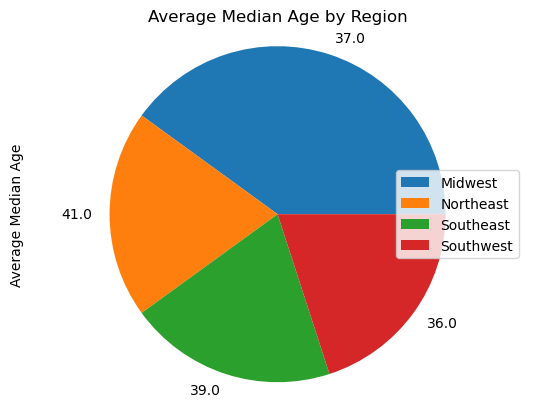

In [49]:
# Generate a pie plot showing the average median age by region
Regional_age_averages = region_averages_df['Average Median Age'].value_counts()
Regional_age_pie = Regional_age_averages.plot(kind="pie", y='Average Median Age')
plt.axis("equal")
labels = ['Midwest', 'Northeast', 'Southeast', 'Southwest', 'West']
plt.legend(labels, loc="center right") 
plt.ylabel("Average Median Age")
plt.title("Average Median Age by Region")
plt.savefig("Figures/Fig1.png")
plt.show()

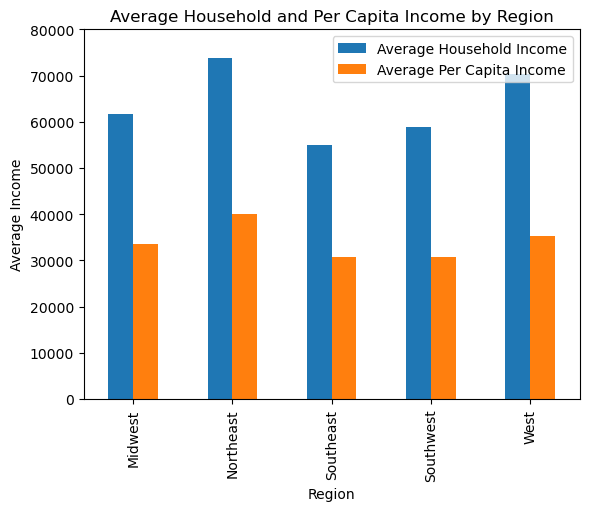

In [50]:
Grouped_income = region_averages_df[["Average Household Income","Average Per Capita Income"]]
Grouped_income.plot(kind='bar')
income_labels = ("Average Household Income", "Average Per Capita Income")
plt.legend(income_labels, loc="upper right") 
plt.ylim(0, 80000)
plt.ylabel("Average Income")
plt.title("Average Household and Per Capita Income by Region")
plt.savefig("Figures/Fig2.png")
plt.show()

In [51]:
income_by_state = census_pd.set_index(["State"])["Household Income"]
income_by_state

State
Pennsylvania      63627.0
California        78672.0
West Virginia     48037.0
Utah              74197.0
New York          71117.0
Alaska            77790.0
Florida           57703.0
South Carolina    54864.0
North Dakota      65315.0
Maine             59489.0
Georgia           61224.0
Alabama           52035.0
New Hampshire     77923.0
Oregon            65667.0
Wyoming           65304.0
Arizona           61529.0
Louisiana         50800.0
Indiana           58235.0
Idaho             58915.0
Connecticut       79855.0
Hawaii            83173.0
Illinois          68428.0
Massachusetts     84385.0
Texas             63826.0
Montana           56539.0
Nebraska          63015.0
Ohio              58116.0
Colorado          75231.0
New Jersey        85245.0
Maryland          87063.0
Virginia          76398.0
Vermont           63477.0
North Carolina    56642.0
Arkansas          49475.0
Washington        77006.0
Kansas            61091.0
Oklahoma          53840.0
Wisconsin         63293.0
Missis

In [52]:
per_capita_income_by_state = census_pd.set_index(["State"])["Per Capita Income"]
per_capita_income_by_state

State
Pennsylvania      35518.0
California        38576.0
West Virginia     27346.0
Utah              30986.0
New York          40898.0
Alaska            37094.0
Florida           32848.0
South Carolina    30727.0
North Dakota      36289.0
Maine             33774.0
Georgia           32427.0
Alabama           28934.0
New Hampshire     41234.0
Oregon            35393.0
Wyoming           34415.0
Arizona           32340.0
Louisiana         29522.0
Indiana           30693.0
Idaho             29494.0
Connecticut       45668.0
Hawaii            37013.0
Illinois          37306.0
Massachusetts     45555.0
Texas             32177.0
Montana           32463.0
Nebraska          33205.0
Ohio              32465.0
Colorado          39545.0
New Jersey        44153.0
Maryland          43352.0
Virginia          41255.0
Vermont           35854.0
North Carolina    31993.0
Arkansas          27724.0
Washington        40837.0
Kansas            32798.0
Oklahoma          29873.0
Wisconsin         34450.0
Missis

In [53]:
# Create new dataframe for averages in regions
state_averages_df = pd.DataFrame({
    "Average Household Income": income_by_state,
    "Average Per Capita Income": per_capita_income_by_state
                                })

state_averages_df

,Average Household Income,Average Per Capita Income
State,,
Pennsylvania,63627.0,35518.0
California,78672.0,38576.0
West Virginia,48037.0,27346.0
Utah,74197.0,30986.0
New York,71117.0,40898.0
Alaska,77790.0,37094.0
Florida,57703.0,32848.0
South Carolina,54864.0,30727.0
North Dakota,65315.0,36289.0


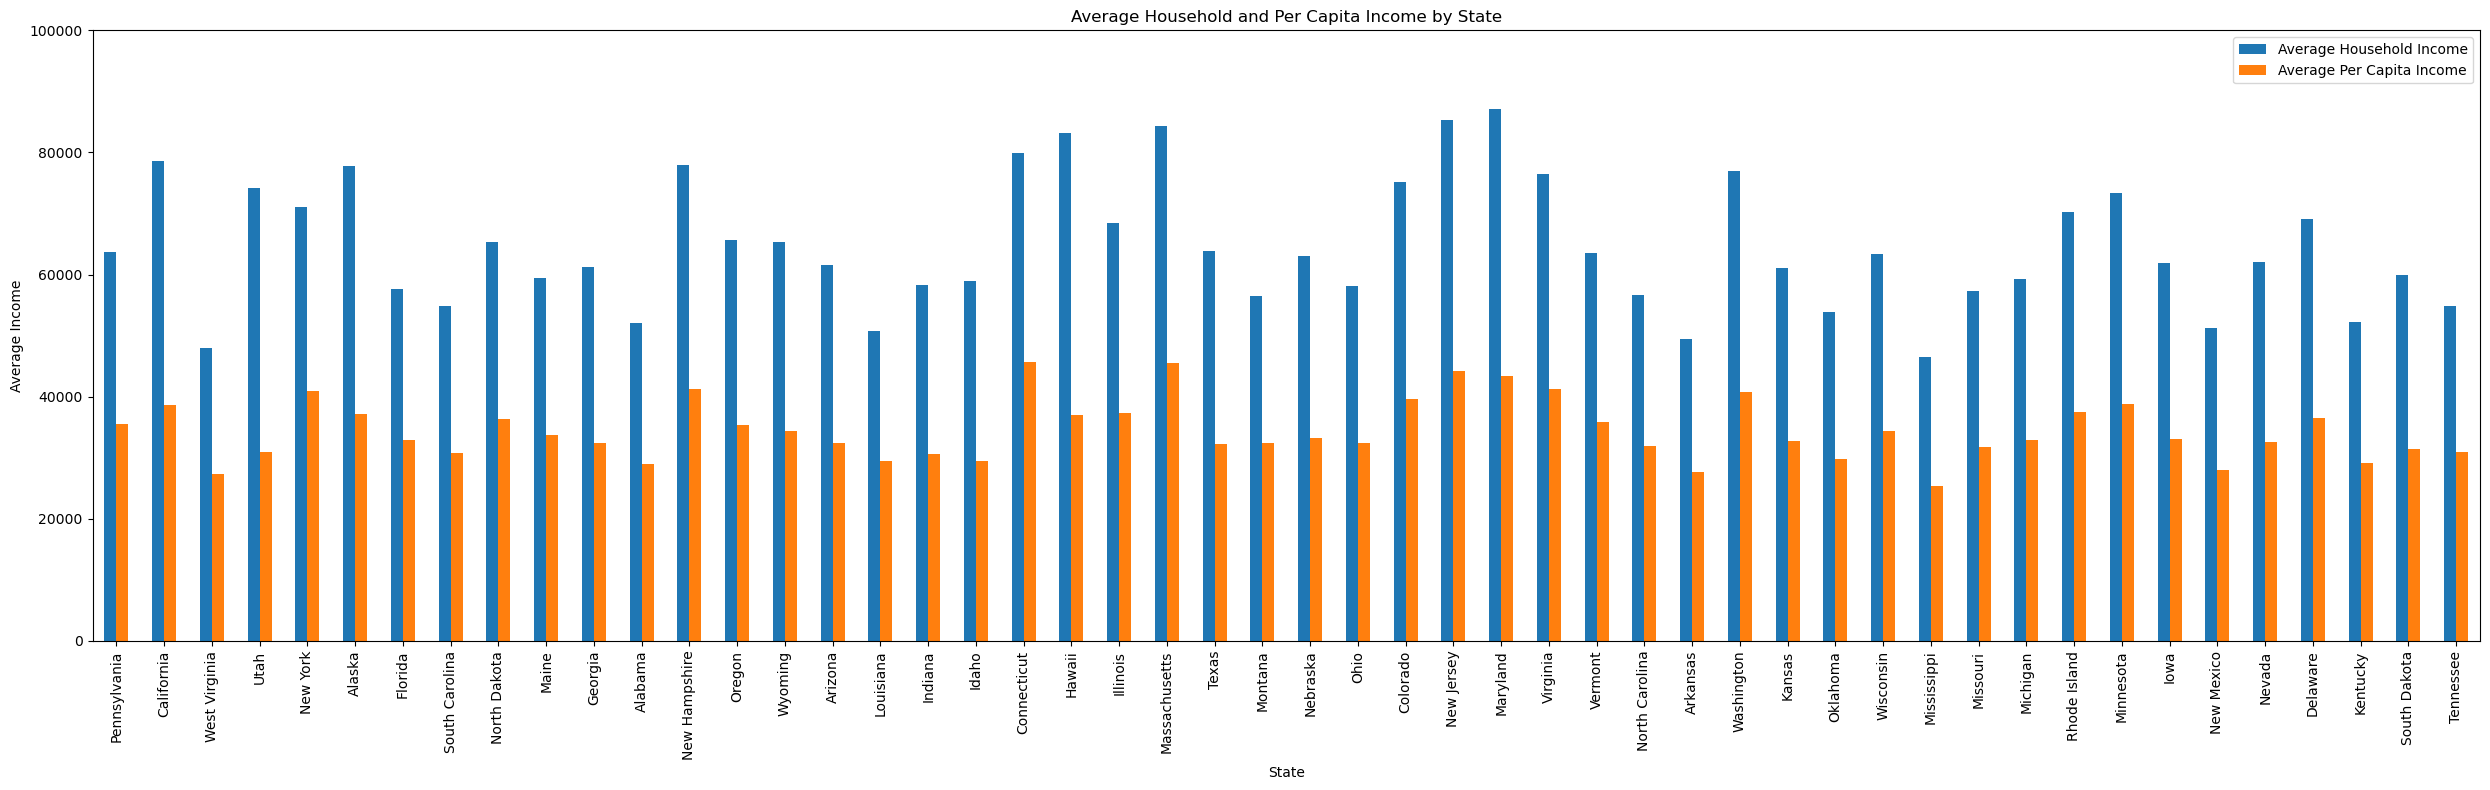

In [54]:
Grouped_state_income = state_averages_df
Grouped_state_income.plot(kind='bar', figsize=(25,8))
income_labels = ("Average Household Income", "Average Per Capita Income")
plt.legend(income_labels, loc="upper right") 
plt.ylim(0, 100000)
plt.ylabel("Average Income")
plt.title("Average Household and Per Capita Income by State")
plt.tight_layout()
plt.savefig("Figures/Fig3.png")
plt.show()